# Predicting Cab prices using XG boost Algorithm

# Preprocessing

In [180]:
#importing / installing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [181]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [182]:
# importing the dataset
data=pd.read_csv('dynamic_pricing.csv')

In [183]:
print(data)

     Number_of_Riders  Number_of_Drivers Location_Category  \
0                  90                 45             Urban   
1                  58                 39          Suburban   
2                  42                 31             Rural   
3                  89                 28             Rural   
4                  78                 22             Rural   
..                ...                ...               ...   
894                49                 29          Suburban   
895                72                 54             Rural   
896                72                 27             Urban   
897                99                  6          Suburban   
898                21                 10             Rural   

    Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                    Silver                    13             4.47   
1                    Silver                    72             4.06   
2                    Silver                  

In [184]:
print(data.head(10))

   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   
5                59                 35             Urban   
6                93                 43          Suburban   
7                62                 39             Rural   
8                79                 14             Rural   
9                42                  6             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   

In [185]:
print(data.tail(10))

     Number_of_Riders  Number_of_Drivers Location_Category  \
889                53                 14          Suburban   
890                79                 22             Rural   
891                44                 24             Urban   
892                34                 12          Suburban   
893                55                 12             Urban   
894                49                 29          Suburban   
895                72                 54             Rural   
896                72                 27             Urban   
897                99                  6          Suburban   
898                21                 10             Rural   

    Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
889                  Silver                    24             3.99   
890                  Silver                    53             3.96   
891                  Silver                    55             4.08   
892                 Regular          

In [186]:
print(data.describe)

<bound method NDFrame.describe of      Number_of_Riders  Number_of_Drivers Location_Category  \
0                  90                 45             Urban   
1                  58                 39          Suburban   
2                  42                 31             Rural   
3                  89                 28             Rural   
4                  78                 22             Rural   
..                ...                ...               ...   
894                49                 29          Suburban   
895                72                 54             Rural   
896                72                 27             Urban   
897                99                  6          Suburban   
898                21                 10             Rural   

    Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                    Silver                    13             4.47   
1                    Silver                    72             4.06   
2          

In [187]:
data.shape

(899, 10)

In [188]:
data.columns

Index(['Number_of_Riders', 'Number_of_Drivers', 'Location_Category',
       'Customer_Loyalty_Status', 'Number_of_Past_Rides', 'Average_Ratings',
       'Time_of_Booking', 'Vehicle_Type', 'Expected_Ride_Duration',
       'Historical_Cost_of_Ride'],
      dtype='object')

In [189]:
print(data.isnull())
print(data.isna())

     Number_of_Riders  Number_of_Drivers  Location_Category  \
0               False              False              False   
1               False              False              False   
2               False              False              False   
3               False              False              False   
4               False              False              False   
..                ...                ...                ...   
894             False              False              False   
895             False              False              False   
896             False              False              False   
897             False              False              False   
898             False              False              False   

     Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                      False                 False            False   
1                      False                 False            False   
2                      False  

In [190]:
data=data.dropna()

In [191]:
print(data)

     Number_of_Riders  Number_of_Drivers Location_Category  \
0                  90                 45             Urban   
1                  58                 39          Suburban   
2                  42                 31             Rural   
3                  89                 28             Rural   
4                  78                 22             Rural   
..                ...                ...               ...   
894                49                 29          Suburban   
895                72                 54             Rural   
896                72                 27             Urban   
897                99                  6          Suburban   
898                21                 10             Rural   

    Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                    Silver                    13             4.47   
1                    Silver                    72             4.06   
2                    Silver                  

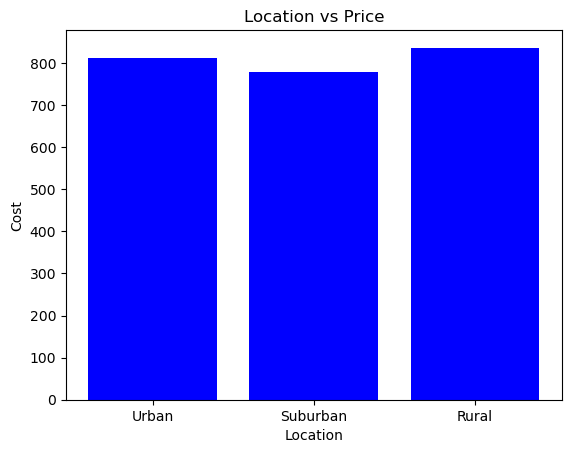

In [192]:

plt.bar(data['Location_Category'], data['Historical_Cost_of_Ride'], color='blue')

# Add labels and title
plt.xlabel('Location')
plt.ylabel('Cost')
plt.title('Location vs Price')

# Show the plot
plt.show()

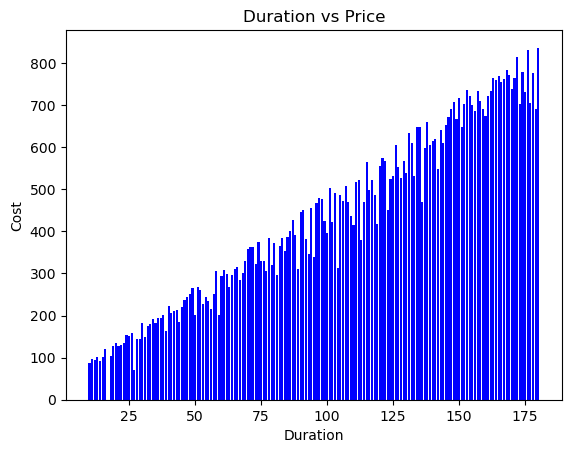

In [193]:

plt.bar(data['Expected_Ride_Duration'], data['Historical_Cost_of_Ride'], color='blue')

# Add labels and title
plt.xlabel('Duration')
plt.ylabel('Cost')
plt.title('Duration vs Price')

# Show the plot
plt.show()

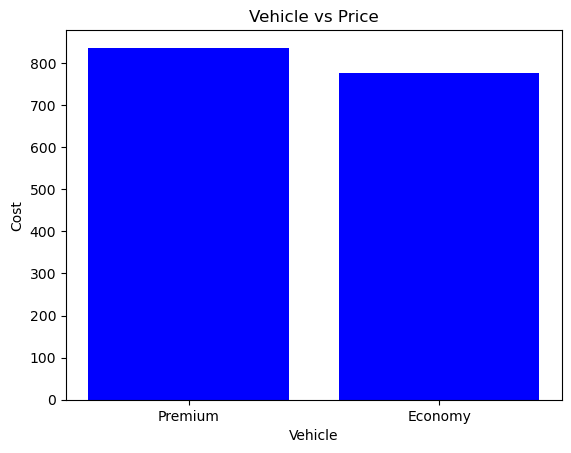

In [194]:

plt.bar(data['Vehicle_Type'], data['Historical_Cost_of_Ride'], color='blue')

# Add labels and title
plt.xlabel('Vehicle')
plt.ylabel('Cost')
plt.title('Vehicle vs Price')

# Show the plot
plt.show()

## XG BOOST ALGORITHM

In [195]:
# Creating the dataset with all independent variables
X = data.iloc[:,:-1]

# Creating the dataset with the dependent variable
Y = data.iloc[:,-1]

In [196]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [197]:

print("The shape of train dataset :")
print(X_train.shape)

print("\n The shape of test dataset :")
print(X_test.shape)

The shape of train dataset :
(719, 9)

 The shape of test dataset :
(180, 9)


In [198]:
print("Distribution of classes of dependent variable in train :")
print(Y_train.value_counts())

print("\n Distribution of classes of dependent variable in test :")
print(Y_test.value_counts())

Distribution of classes of dependent variable in train :
Historical_Cost_of_Ride
362.053331    1
261.445150    1
173.157754    1
355.959507    1
92.031047     1
             ..
49.234784     1
242.271966    1
249.302975    1
172.629434    1
520.565341    1
Name: count, Length: 719, dtype: int64

 Distribution of classes of dependent variable in test :
Historical_Cost_of_Ride
691.501291    1
336.394392    1
128.016760    1
210.256760    1
173.887474    1
             ..
445.125411    1
563.980327    1
205.495760    1
551.557234    1
232.283455    1
Name: count, Length: 180, dtype: int64


In [199]:
import xgboost as xgb

In [200]:
label_encoder = LabelEncoder()
for col in ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

X_train = pd.get_dummies(X_train, columns=['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type'])
X_test = pd.get_dummies(X_test, columns=['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type'])


In [201]:
dtrain=xgb.DMatrix(X_train,label=Y_train)
dtest=xgb.DMatrix(X_test)

In [202]:
parameters = {
    'max_depth': 7,
    'eta': 0.1,  # Learning rate, can be adjusted
    'objective': 'reg:squarederror',  # Objective for regression
    'eval_metric': 'rmse',  # Root Mean Squared Error as evaluation metric
    'learning_rate': 0.05
}
xg = xgb.train(parameters, dtrain, num_round)


In [203]:
#now predicting our model on train set 
train_class_preds_probs=xg.predict(dtrain) 
#now predicting our model on test set 
test_class_preds_probs =xg.predict(dtest)

In [204]:
#length of pred prob
len(train_class_preds_probs)

719

In [205]:
#evaluation from thresold value
train_class_preds = []
test_class_preds = []
for i in range(0,len(train_class_preds_probs)):
  if train_class_preds_probs[i] >= 0.5:
    train_class_preds.append(1)
  else:
    train_class_preds.append(0)

for i in range(0,len(test_class_preds_probs)):
  if test_class_preds_probs[i] >= 0.5:
    test_class_preds.append(1)
  else:
    test_class_preds.append(0)

In [206]:
#print the array of pred prob
test_class_preds_probs[:20]

array([502.66837, 527.86584, 377.94608, 556.52374, 318.50275, 565.0325 ,
       405.08432, 472.58945, 423.4881 , 392.3374 , 325.41122, 241.43054,
       489.41162, 244.00822, 389.7109 , 429.41568, 279.302  , 413.92508,
       134.17398, 486.98624], dtype=float32)

In [207]:
#length of y train
len(Y_train)

719

In [208]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)  # You can change n_neighbors based on your requirement
knn.fit(X_train, Y_train)

# Predict
knn_train_preds = knn.predict(X_train)
knn_test_preds = knn.predict(X_test)

In [209]:
knn_train_rmse = mean_squared_error(Y_train, knn_train_preds, squared=False)
knn_test_rmse = mean_squared_error(Y_test, knn_test_preds, squared=False)
print("KNN RMSE (Train):", knn_train_rmse)
print("KNN RMSE (Test):", knn_test_rmse)

KNN RMSE (Train): 62.73410936990108
KNN RMSE (Test): 73.72598594227395


c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\rajit\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [210]:
# Create a DataFrame
df = pd.DataFrame({
    'Test Class Predictions Probabilities': test_class_preds_probs,
    'KNN Test Predictions': knn_test_preds
})

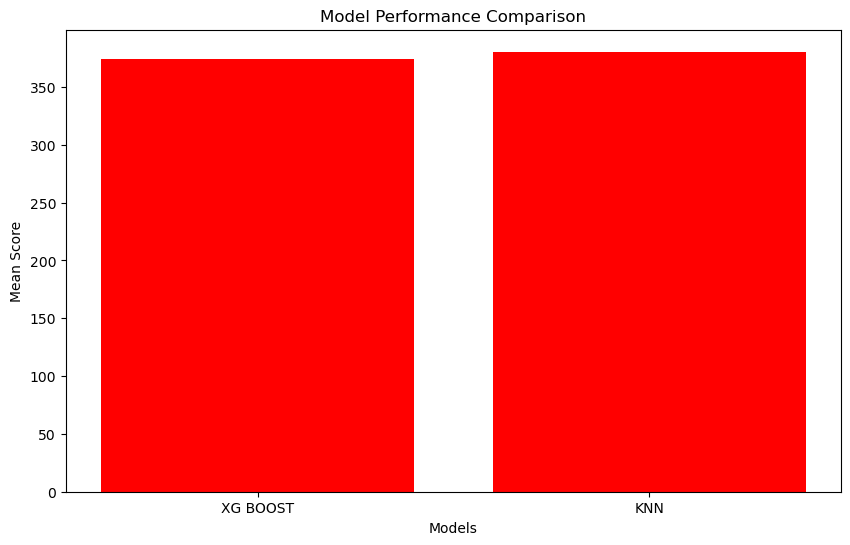

In [212]:

import numpy as np
import matplotlib.pyplot as plt

# Assuming test_class_preds_probs and knn_test_preds are arrays of probabilities/scores
# Calculate mean scores for each model
mean_xgboost_score = np.mean(test_class_preds_probs)
mean_knn_score = np.mean(knn_test_preds)

labels = ['XG BOOST', 'KNN']
values = [mean_xgboost_score, mean_knn_score]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='red')

# Add title and labels
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Mean Score')
plt.show()
